In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = pathlib.Path("/content/drive/MyDrive/sops_anomaly_notebook")

Mounted at /content/drive


In [3]:
RESULTS_ROOT = pathlib.Path('..') / "results"

NAB_SUPERVISED = RESULTS_ROOT / "nab_standarized"
NAB_UNSUPERVISED = RESULTS_ROOT / "nab_unsupervised"

## NAB Tables

In [ ]:
res_dir = NAB_UNSUPERVISED
detectors = []
avg_scores = []
columns = None
for detector in res_dir.iterdir():
    scores = pd.read_csv(detector / "scores.csv", index_col=0)
    scores = scores.loc[[not x.startswith('artificialNoAnomaly') for x in scores.index]]

    if columns is None:
        columns = scores.columns
    detectors.append(detector.name)
    avg_scores.append([round(x, 3) for x in list(scores.mean())])

result_df = pd.DataFrame(avg_scores, index=detectors, columns=columns)

In [9]:
print(result_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  accuracy &  f1\_score &  precision &  recall &  roc\_auc \\
\midrule
lstm\_ed                &     0.347 &     0.231 &      0.210 &   0.807 &    0.543 \\
variationalautoencoder &     0.764 &     0.373 &      0.417 &   0.535 &    0.656 \\
lstm\_ad                &     0.613 &     0.271 &      0.244 &   0.592 &    0.596 \\
donut                  &     0.606 &     0.282 &      0.222 &   0.622 &    0.606 \\
donut\_with\_labels      &     0.680 &     0.328 &      0.304 &   0.587 &    0.630 \\
autoencoder            &     0.758 &     0.370 &      0.414 &   0.543 &    0.656 \\
\bottomrule
\end{tabular}



## MNIST Plots

In [ ]:
scores_ae = {}
scores_vae = {}
for folder in RESULTS_ROOT.glob('*percent'):
    p = int(folder.name.rstrip('percent'))
    scores_ae[p] = pd.read_csv(folder / 'autoencoder', index_col=0)
    scores_vae[p] = pd.read_csv(folder / 'variationalautoencoder', index_col=0)

In [ ]:
percents = (0, 1, 3, 5, 10, 15, 20, 30, 40, 50)
def plot_results(anomaly_classes, measure, result_dict):
    results = [list() for _ in range(len(anomaly_classes))]
    for i, ac in enumerate(anomaly_classes):
        for perc in percents:
            results[i].append(result_dict[perc][measure][ac])
    
    for cls, res in zip(anomaly_classes, results):
        plt.plot(percents, res, label=cls)

    plt.grid()
    plt.legend()
    plt.show()

    return anomaly_classes, results

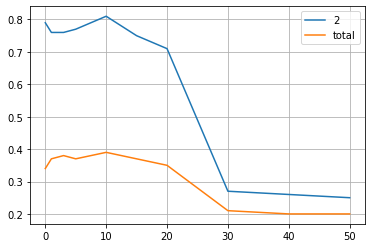

In [ ]:
ae_p, ae_r = plot_results([2, 'total'], 'f1_score', scores_ae)

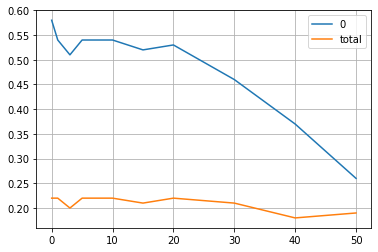

In [ ]:
vae_p, vae_r = plot_results([0, 'total'], 'f1_score', scores_vae)

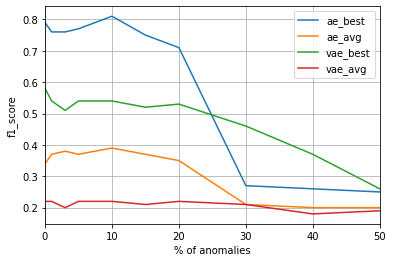

In [ ]:
plt.plot(percents, ae_r[0], label='ae_best')
plt.plot(percents, ae_r[1], label='ae_avg')
plt.plot(percents, vae_r[0], label='vae_best')
plt.plot(percents, vae_r[1], label='vae_avg')
plt.xlim((0, 50))
plt.grid()
plt.legend()
plt.xlabel('% of anomalies')
plt.ylabel('f1_score')
plt.show()